In [0]:
import torchvision
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from skimage import io
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

# **Downloading of Data Set**

In [3]:
# download the Fashion MNIST training data
train_dataset = torchvision.datasets.FashionMNIST(root='./', train=True, download=True)

# download the Fashion MNIST evaluation data
eval_dataset = torchvision.datasets.FashionMNIST(root='./', train=False, download=True)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

# Checking Data

In [5]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [6]:
eval_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test

Label 9 Ankle boot


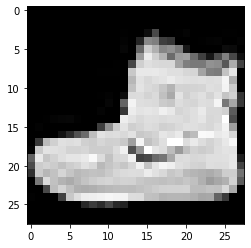

In [9]:
image_1, label_1 = train_dataset[0]
imshow(np.asarray(image_1),cmap='gray')
print("Label",label_1,labels_dict[label_1])

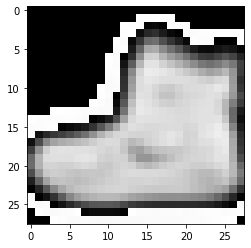

In [51]:
blurred_f = ndimage.gaussian_filter(image_1, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

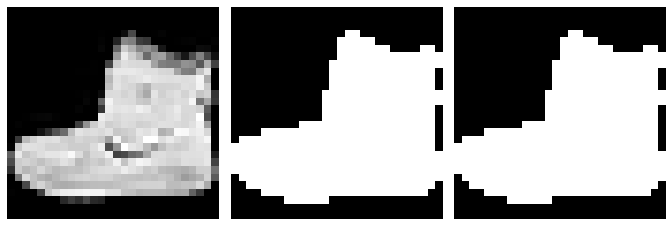

In [60]:
open_square = ndimage.binary_opening(image_1)

eroded_square = ndimage.binary_erosion(image_1)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_1)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_1, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

Label 8 Bag


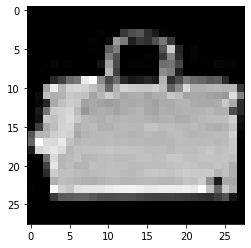

In [15]:
image_2, label_2 = train_dataset[99]
imshow(np.asarray(image_2),cmap='gray')
print("Label",label_2,labels_dict[label_2])

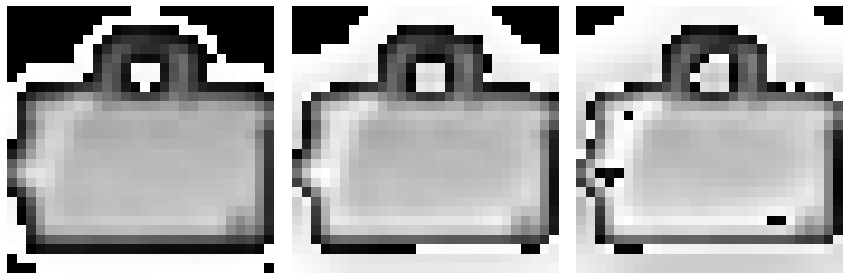

In [55]:
blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened_1 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 2)
alpha = 1
sharpened_2 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 3)
alpha = 1
sharpened_3 = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(sharpened_1, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(sharpened_2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened_3, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

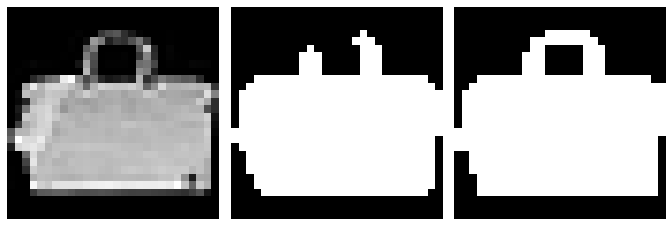

In [63]:
open_square = ndimage.binary_opening(image_2)

eroded_square = ndimage.binary_erosion(image_2)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_2)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_2, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

Label 6 Shirt


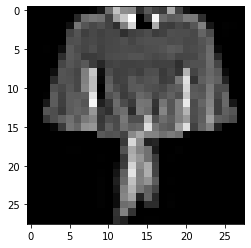

In [21]:
image_3, label_3 = train_dataset[402]
imshow(np.asarray(image_3),cmap='gray')
print("Label",label_3,labels_dict[label_3])

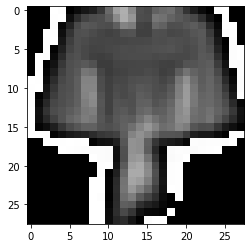

In [56]:
blurred_f = ndimage.gaussian_filter(image_3, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

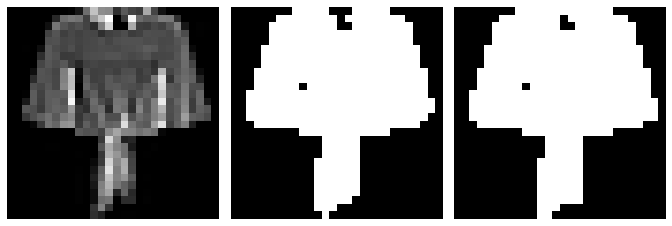

In [65]:
open_square = ndimage.binary_opening(image_3)

eroded_square = ndimage.binary_erosion(image_3)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_3)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_3, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

Label 2 Pullover


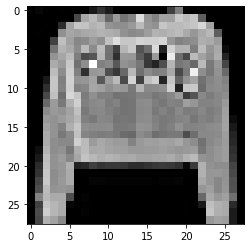

In [57]:
image_4, label_4 = train_dataset[20432]
imshow(np.asarray(image_4),cmap='gray')
print("Label",label_4,labels_dict[label_4])

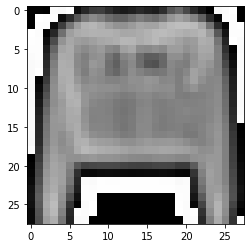

In [59]:
blurred_f = ndimage.gaussian_filter(image_4, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

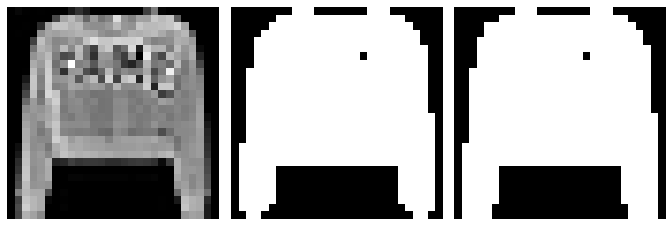

In [66]:
open_square = ndimage.binary_opening(image_4)

eroded_square = ndimage.binary_erosion(image_4)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_4)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_4, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

# **Preparing Data**
Creating Dataframes

In [0]:
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.data.numpy()

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_labels.shape

(60000,)

In [0]:
eval_images = eval_dataset.data.numpy()
eval_labels = eval_dataset.targets.data.numpy()

In [31]:
eval_images.shape

(10000, 28, 28)

In [32]:
eval_labels.shape

(10000,)